# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

`Your answer here`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
import pandas as pd

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)



1.   Можно сделать вывод о содержании датасета - какие данные примерно в нем есть, но нельзя сделать вывод о всем датасете (количество пропусков, качество данных, статистика по данным)
2.   Duplicated в Python является методотом библиотеки Pandas, который используется для поиска дубликатов в DataFrame или Series.
Он возвращает булеву  серию (True/False), где True говорит о том, значение является дубликатом, а False — что это первое вхождение. Метод duplicated в анализе дубликатов играет важную роль для выявления дубликатов, позволяя выявить повторяющиеся записи, которые могут повлиять на результат анализа.   


In [4]:
# отобразим 30 случайных строк тренировочного датасета
print("30 случайных строк тренировочного датасета")

# возьмем метод sample (количество n=30) для случайной выборки строк
print(df_train.sample(n=30))

30 случайных строк тренировочного датасета
                                        name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   
132          Mercedes-Benz S-Class S 350 CDI  2017        5850000      47000 

In [5]:
# отобразим первые пять и последние пять строк
print("первые 5 строк тестового датасета")

print(df_test.head(5))

print("последние 5 строк тестового датасета")

print(df_test.tail(5))

первые 5 строк тестового датасета
                                     name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at

In [6]:
# определим имеются ли пропуски, для которых есть пропущенные значения

def propuski_v_dannih(df, name):
    print(f"пропуски в датасете '{name}'")
    # возбмем .isnull().sum() для подсчета  значений по столбцам
    propuski = df.isnull().sum()
    # отфильтруем только те столбцы, где количество пропусков > 0
    kolonki_propuski = propuski[propuski > 0]

    if kolonki_propuski.empty:
        print(f"в датасете '{name}' пропущенных значений нет.")
    else:
        print("колонки с пропущенными значениями:")
        print(kolonki_propuski)
    print("\n")

propuski_v_dannih(df_train, 'Тренировочный (df_train)')
propuski_v_dannih(df_test, 'Тестовый (df_test)')

пропуски в датасете 'Тренировочный (df_train)'
колонки с пропущенными значениями:
mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64


пропуски в датасете 'Тестовый (df_test)'
колонки с пропущенными значениями:
mileage      19
engine       19
max_power    19
torque       19
seats        19
dtype: int64




In [7]:
# проверим есть ли в данных  дубликаты

def proverka_duplicate (df, name):
    print(f" Явные дубликаты в датасете '{name}' ")
    # возьем .duplicated().sum() для подсчета дубликатов
    kolichestvo_dup = df.duplicated().sum()

    if kolichestvo_dup == 0:
        print(f"В датасете '{name}' явных дубликатов нет.")
    else:
        print(f"Найдено {kolichestvo_dup} явных дубликатов.")
    print("\n")

proverka_duplicate(df_train, 'Тренировочный (df_train)')
proverka_duplicate(df_test, 'Тестовый (df_test)')

 Явные дубликаты в датасете 'Тренировочный (df_train)' 
Найдено 985 явных дубликатов.


 Явные дубликаты в датасете 'Тестовый (df_test)' 
Найдено 62 явных дубликатов.




In [8]:
df_train.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,202
engine,202


In [9]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [10]:
# @title
!pip install ydata-profiling

In [11]:
# на странице в гитхабе были требования для запуска дашборда
import numpy as np
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train, title="Profiling Report")

# чтобы отобразить этот отчет в Юпитер ноутбуке нужно ввести эту команду
# profile.to_notebook_iframe()

# чтобы сохранить отчет как html файл нужно ввести команду
profile.to_file("profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 13.13it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [12]:
# список столбцов, для которых подходит медиана
chislo_kol = ['year', 'selling_price', 'km_driven', 'seats']

# список категориальных (текстовых) столбцов, для которых подходит мода
kategor_kol = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'torque', 'mileage', 'engine', 'max_power']

# проведем обработку числовых столбцов и заполним пропущенные значения медианой

print(" Заполнение числовых пропусков медианой (трейн) ")
for col in chislo_kol:
    if col in df_train.columns and df_train[col].isnull().any():
        median_val = df_train[col].median()
        print(f"Заполнение '{col}' медианой: {median_val}")
        df_train[col] = df_train[col].fillna(median_val)
        df_test[col] = df_test[col].fillna(median_val) # Используем медиану из трейна

# обработаем категориальные столбцы и заполним пропуски модой

print("\n  Заполнение категориальных пропусков модой (трейн) ")
for col in kategor_kol:
    if col in df_train.columns and df_train[col].isnull().any():
        # мода может вернуть Series, берем первое значение [0]
        mode_val = df_train[col].mode()[0]
        print(f"Заполнение '{col}' модой: '{mode_val}'")
        df_train[col] = df_train[col].fillna(mode_val)
        df_test[col] = df_test[col].fillna(mode_val) # Используем моду из трейна

# проверим результаты
print("\n  проверка результатов после комплексного заполнения ")
def proverka_propusk(df, name):
    missing_count = df.isnull().sum().sum()
    if missing_count == 0:
        print(f" В датасете '{name}' пропусков больше нет.")
    else:
        print(f" В датасете '{name}' осталось {missing_count} пропусков.")

proverka_propusk(df_train, 'тренировочный (df_train)')
proverka_propusk(df_test, 'тестовый (df_test)')


 Заполнение числовых пропусков медианой (трейн) 
Заполнение 'seats' медианой: 5.0

  Заполнение категориальных пропусков модой (трейн) 
Заполнение 'torque' модой: '190Nm@ 2000rpm'
Заполнение 'mileage' модой: '18.9 kmpl'
Заполнение 'engine' модой: '1248 CC'
Заполнение 'max_power' модой: '74 bhp'

  проверка результатов после комплексного заполнения 
 В датасете 'тренировочный (df_train)' пропусков больше нет.
 В датасете 'тестовый (df_test)' пропусков больше нет.


### **Задание 2 (0.5 балла)**

На прошлом шаге вы убедились, что явных дубликатов в таблице нет. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [13]:
print("список столбцов в df_train:")
print(df_train.columns.tolist())

список столбцов в df_train:
['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats']


In [14]:
# мой полный список столбцов
vse_stolbci = ['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats']
# целевая переменная
target_stolbec = 'selling_price'

# чтобы исключить целевую переменную я создаю X_train (признаки) и y_train (целевая переменная)
X_train = df_train.drop(columns=[target_stolbec])
y_train = df_train[target_stolbec]

print(f"X_train успешно создан. Форма: {X_train.shape}")

# Маска, которая помечает все строки, у которых есть дубликаты
# keep=False помечает и оригинал, и копию
duplicate_mask = X_train.duplicated(keep=False)

# отфильтруем X_train, чтобы оставить только те строки, которые являются дубликатами
duplicate_rows = X_train[duplicate_mask]

# подсчитаем продублированные строки
num_duplicates_total = len(duplicate_rows)

print(f"\nКоличество объектов с одинаковым признаковым описанием (строк, участвующих в дублировании): {num_duplicates_total}")

# количество вторых и последующих вхождений дубликатов
num_second_plus_duplicates = X_train.duplicated(keep='first').sum()
print(f"Количество уникальных дублирующихся наборов признаков (вторых и последующих вхождений): {num_second_plus_duplicates}")

X_train успешно создан. Форма: (6999, 12)

Количество объектов с одинаковым признаковым описанием (строк, участвующих в дублировании): 1799
Количество уникальных дублирующихся наборов признаков (вторых и последующих вхождений): 1159


In [15]:
if num_duplicates_total > 0:
    print("\n--- Отображение объектов с одинаковым признаковым описанием (отсортировано) ---")

    # отсортируем чтобы дубликаты шли подряд
    sorted_duplicates = duplicate_rows.sort_values(by=list(X_train.columns))

    # отобразим результат
    print(sorted_duplicates)
else:
    print("\nОбъектов с одинаковым признаковым описанием не найдено.")


--- Отображение объектов с одинаковым признаковым описанием (отсортировано) ---
                                      name  year  km_driven    fuel  \
1703  Audi Q3 2.0 TDI Quattro Premium Plus  2017      22000  Diesel   
6307  Audi Q3 2.0 TDI Quattro Premium Plus  2017      22000  Diesel   
1836               Audi Q5 3.0 TDI Quattro  2014      76131  Diesel   
6704               Audi Q5 3.0 TDI Quattro  2014      76131  Diesel   
117             Audi Q5 35TDI Premium Plus  2018      31800  Diesel   
...                                    ...   ...        ...     ...   
5637        Volvo XC40 D4 Inscription BSIV  2019      20000  Diesel   
5652        Volvo XC40 D4 Inscription BSIV  2019      20000  Diesel   
5753        Volvo XC40 D4 Inscription BSIV  2019      20000  Diesel   
5991        Volvo XC40 D4 Inscription BSIV  2019      20000  Diesel   
6778        Volvo XC40 D4 Inscription BSIV  2019      20000  Diesel   

     seller_type transmission        owner     mileage   engine   

In [16]:
# удалим дубликаты

print(f"Размер df_train до удаления дубликатов: {df_train.shape}")

# определим столбцы признаков (все, кроме столбца с целевой переменной)
feature_columns = [col for col in df_train.columns if col != target_stolbec]

# удалим строки из df_train, используя только столбцы признаков для поиска дубликатов.
#    keep='first' оставляет первое вхождение
#    применим метод drop_duplicates() напрямую к df_train, указывая subset
df_train_chist = df_train.drop_duplicates(subset=feature_columns, keep='first')

# обновим основную переменную df_train
df_train = df_train_chist

print(f"Размер df_train после удаления дубликатов: {df_train.shape}")

# создаем маску, которая показывает, какие строки были бы удалены (взяла совет из чата по мл)
mask_udalen_dublicat = df_train.duplicated(subset=feature_columns, keep='first')
print(f"Маска для удаленных строк (сколько строк было удалено): {mask_udalen_dublicat.sum()}")

# сброс индексов для чистоты данных
df_train.reset_index(drop=True, inplace=True)
print("Индексы строк обновлены (сброшены).")

Размер df_train до удаления дубликатов: (6999, 13)
Размер df_train после удаления дубликатов: (5840, 13)
Маска для удаленных строк (сколько строк было удалено): 0
Индексы строк обновлены (сброшены).


In [17]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [18]:
def udalenie_stolbec(df):
    #  удалим столбец 'torque'
    # проверим наличие столбца перед удалением, чтобы избежать ошибок
    if 'torque' in df.columns:
        print(f"Удаляем столбец 'torque'.")
        df = df.drop(columns=['torque'])
    else:
        print(f"Столбец 'torque' не найден в датафрейме.")
#  убирем единицы измерения и приводим тип данных к float

    # обработаем 'mileage' (пример формата: "15 kmpl")
    if 'mileage' in df.columns:
        print(f"Очищаем и преобразуем 'mileage' в float.")
        # Оставляем только числа и точку, удаляя буквы и пробелы
        df['mileage'] = df['mileage'].astype(str).str.findall(r'(\d+\.\d+|\d+)').str[0]
        # Преобразуем в float. Если будут проблемы с преобразованием, ставим NaN
        df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')

    # обработаем 'engine' (пример формата: "1498 CC")
    if 'engine' in df.columns:
        print(f"Очищаем и преобразуем 'engine' в float.")
        # Оставляем только числа, удаляя " CC"
        df['engine'] = df['engine'].astype(str).str.findall(r'(\d+)').str[0]
        df['engine'] = pd.to_numeric(df['engine'], errors='coerce')

    # обработаем 'max_power' (пример формата: "100 bhp")
    if 'max_power' in df.columns:
        print(f"Очищаем и преобразуем 'max_power' в float.")
        # Оставим только числа и точку, удаляя буквы и пробелы
        df['max_power'] = df['max_power'].astype(str).str.findall(r'(\d+\.\d+|\d+)').str[0]
        df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

    return df

# применяем функцию к обоим наборам данным
df_train = udalenie_stolbec(df_train)
df_test = udalenie_stolbec(df_test)

print("\n Проверка результатов ")
print("Информация о df_train после преобразований:")
# удобная вещь для быстрого обзора датасета
df_train.info()

print("\n Информация о df_test после преобразований:")
df_test.info()


Удаляем столбец 'torque'.
Очищаем и преобразуем 'mileage' в float.
Очищаем и преобразуем 'engine' в float.
Очищаем и преобразуем 'max_power' в float.
Удаляем столбец 'torque'.
Очищаем и преобразуем 'mileage' в float.
Очищаем и преобразуем 'engine' в float.
Очищаем и преобразуем 'max_power' в float.

 Проверка результатов 
Информация о df_train после преобразований:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int64

In [19]:
# учитывая специфику столбца torque с данными  - 380Nm@ 1750-2500rpm, проще всего
# взять медиану 200 и заполнить ей этот столбец
torque_mediana = 200.0

# добавим столбец 'torque' обратно в df_train и df_test
df_train['torque'] = torque_mediana
df_test['torque'] = torque_mediana

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [20]:
print(" заполненим оставшиеся пропуски и преобразуем данные ")

# теперь приводим к типу int64
df_train['engine'] = df_train['engine'].astype('int64')
df_test['engine'] = df_test['engine'].astype('int64')
print(f"Столбец 'engine' успешно преобразован в int64.")

# теперь приводим к типу int64
df_train['seats'] = df_train['seats'].astype('int64')
df_test['seats'] = df_test['seats'].astype('int64')
print(f"Столбец 'seats' успешно преобразован в int64.")

print("\n  проверка результатов ")
print("  информация о df_train после преобразований: ")
df_train.info()

print("\n  информация о df_test после преобразований: ")
df_test.info()

 заполненим оставшиеся пропуски и преобразуем данные 
Столбец 'engine' успешно преобразован в int64.
Столбец 'seats' успешно преобразован в int64.

  проверка результатов 
  информация о df_train после преобразований: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int64  
 10  max_power      5839 non-null   float64
 11  seats          5840 non-null   int64  
 12  torque         5840 non-null   float64
dtypes: float6

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [21]:
print(" Основные статистики по числовым столбцам (трейн)")

# по умолчанию describe() работает с числовыми данными
print(df_train.describe())


print(" Основные статистики по числовым столбцам (тестовая выборка) ")

print(df_test.describe())

 Основные статистики по числовым столбцам (трейн)
              year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.415872  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.987056   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.100000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  torque  
count  5839.000000  5840.000000  5840.0  
mean     87.661066     5.426712   200.0  
std      31.719664     0.982344     0.0  
min       0.000000     2.000000   200.0  
25%      68.000000     5.000000   200.0  
50% 

In [22]:
assert df_train.shape == (5840, 13)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

- Можно ли предположить на основе распределений связь признаков с целевой переменной?
Да. Найдем строку которая соответствует нашей целевой переменной -'selling_price', рассмотрев мы видим сильную линейную связь. Например, для пары engine и selling_price (чем больше объем двигателя, тем выше цена).
- Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков? Да. Изучим поподробнее engine и max_power будут сильно положительно коррелировать. Точки имеют наклон вниз  year (год выпуска) и km_driven (пробег) будут иметь слабую отрицательную корреляцию. Pairplot помогает визуально оценить линейные взаимосвязи. Для точного количественного подтверждения гипотез о корреляциях обычно используют тепловую карту (heatmap) с коэффициентами корреляции Пирсона.

<Figure size 1200x1200 with 0 Axes>

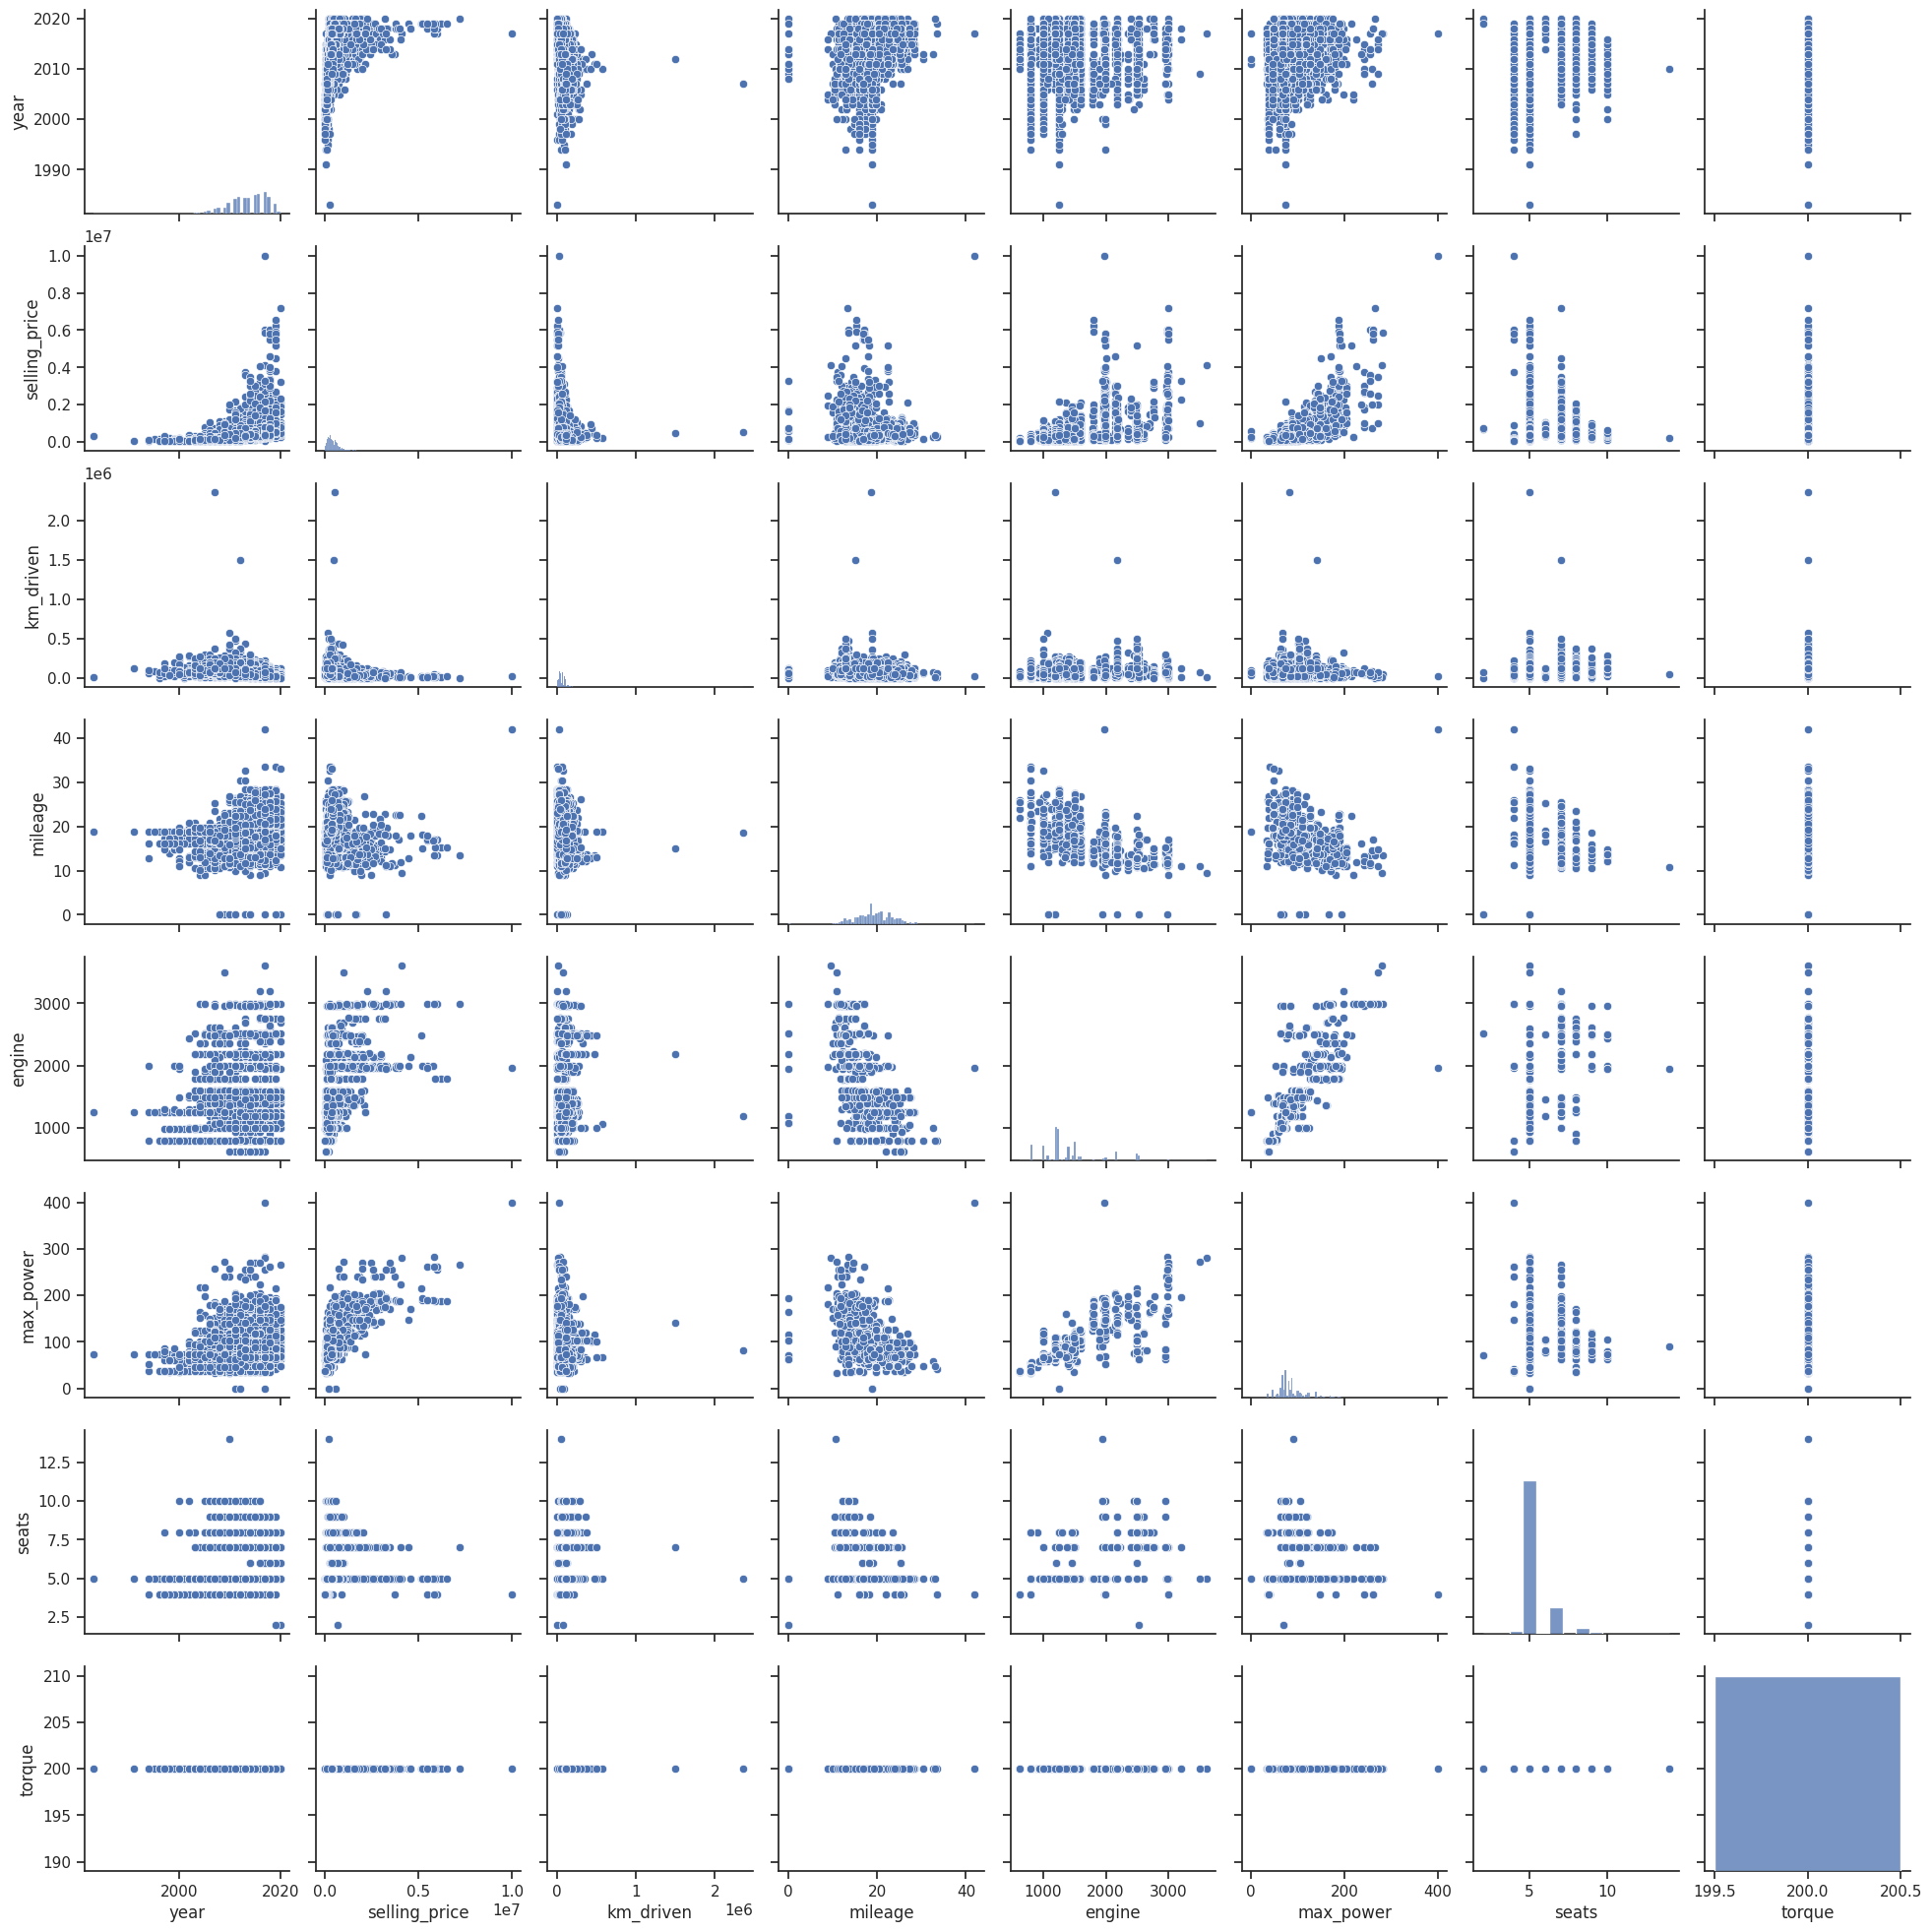

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# настроим размер фигуры для лучшей читаемости
sns.set(style="ticks", color_codes=True)
plt.figure(figsize=(12, 12))

# построим pairplot только для числовых столбцов
# Seaborn автоматически выбирает только числовые столбцы, даже если есть категориальные значения
sns.pairplot(df_train)

# отобразим график
plt.show()

<Figure size 1200x1200 with 0 Axes>

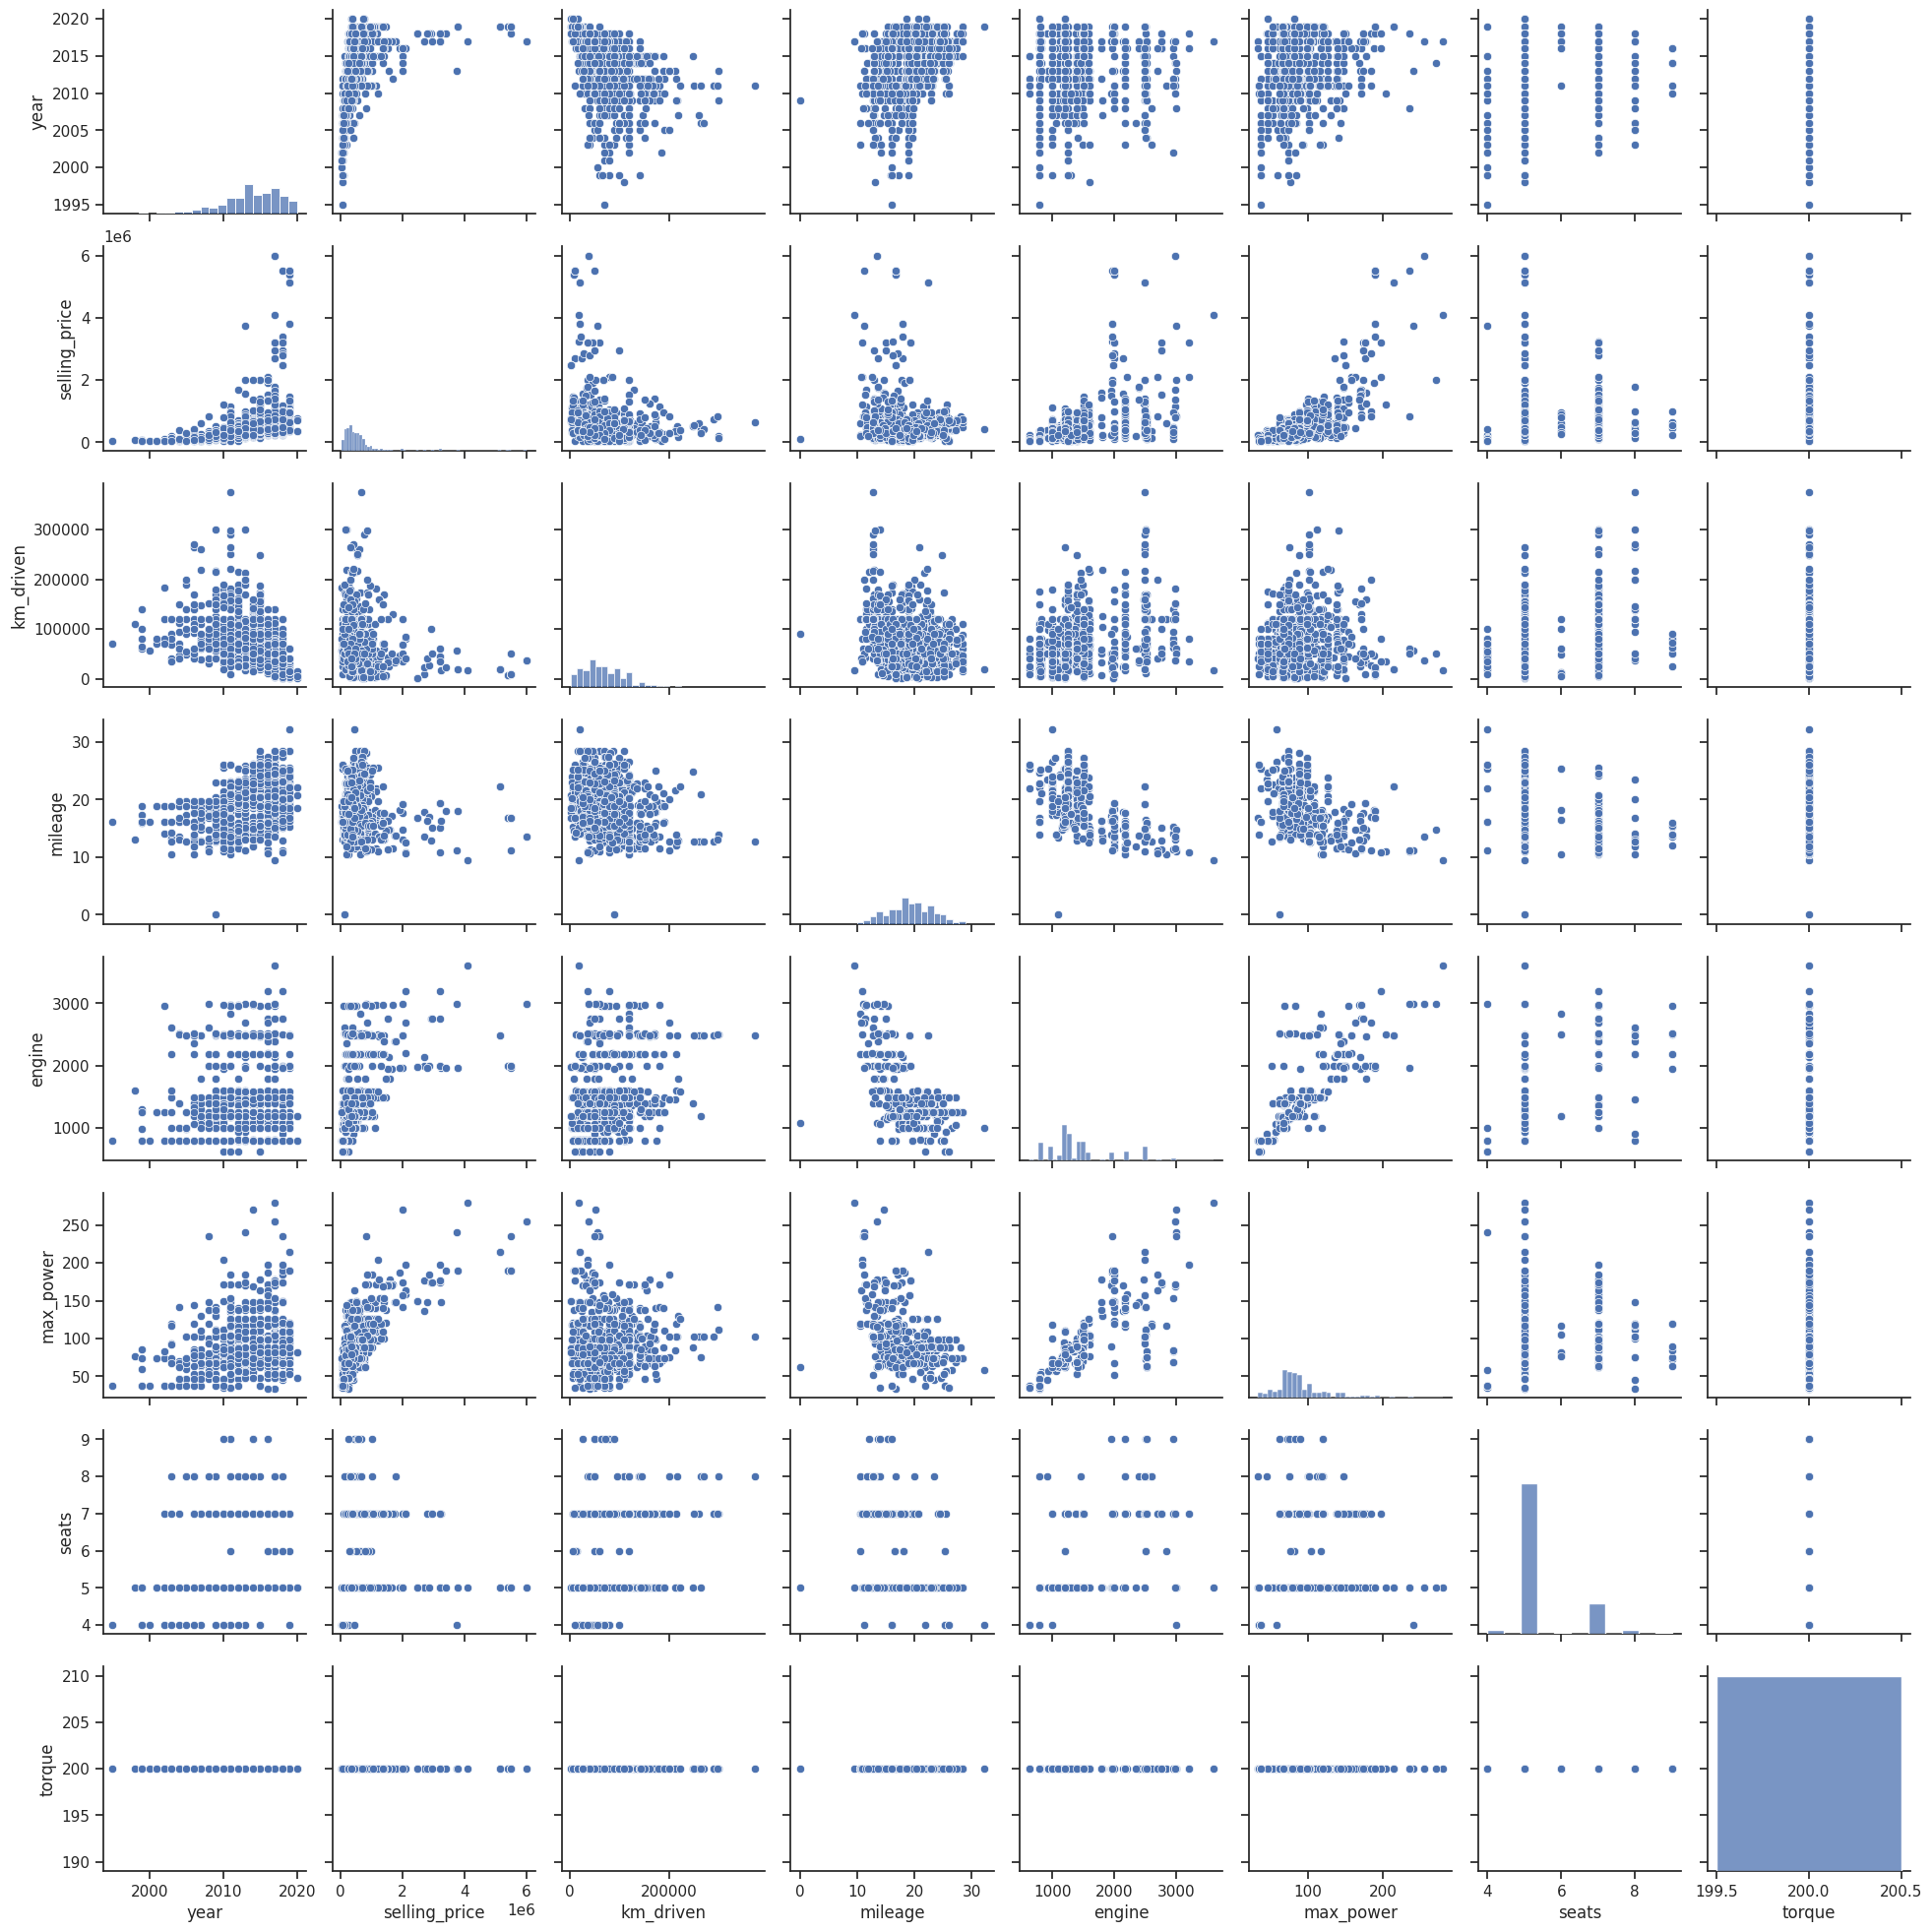

In [24]:
sns.set(style="ticks", color_codes=True)
plt.figure(figsize=(12, 12))

# Строим pairplot для тестовых данных
sns.pairplot(df_test)

# отобразим график
plt.show()

Сравним график для тренировочных данных с графиком для тестовых данных.Графики если они разделены правильно, то они должны быть похожи. Распределения на диагоналях (гистограммы): Форма гистограмм для каждого признака (например, engine, km_driven, selling_price) по большей части идентична в обоих графиках. Пики, впадины и общий размах значений совпадают.
Диаграммы рассеяния (scatterplot): Облака точек на попарных графиках должны иметь одинаковую форму, плотность и направление (одинаковые корреляции).
Так как графики похожи это означает, что оба набора данных (тренировочный и тестовый) извлечены из одного и того же базового распределения данных.
Значение: Это очень хороший знак. Модель, которую мы обучим на df_train, сможет адекватно прогнозировать результаты на df_test, так как тестовые данные представляют собой ту же реальность, что и тренировочные.





### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [25]:
# выбираем только числовые столбцы для расчета корреляции
# это автоматически исключит столбцы с типом данных 'object' (например, 'name', 'fuel', 'owner')
chislovie_df_train = df_train.select_dtypes(include=[np.number])

print("Столбцы, используемые для расчета корреляции:")
print(chislovie_df_train.columns.tolist())

# вычисляем матрицу корреляций Пирсона для числовых данных
correlation_matrix = chislovie_df_train.corr(method='pearson')

print("\n Матрица корреляций Пирсона (только числовые признаки):")

# отобразим матрицу
print(correlation_matrix)

Столбцы, используемые для расчета корреляции:
['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque']

 Матрица корреляций Пирсона (только числовые признаки):
                   year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.427279  -0.368966  0.346899  0.002819   
selling_price  0.427279       1.000000  -0.164828 -0.102658  0.447672   
km_driven     -0.368966      -0.164828   1.000000 -0.183123  0.229766   
mileage        0.346899      -0.102658  -0.183123  1.000000 -0.571335   
engine         0.002819       0.447672   0.229766 -0.571335  1.000000   
max_power      0.168423       0.695494   0.022248 -0.370723  0.682434   
seats          0.041178       0.149953   0.192328 -0.449306  0.652172   
torque              NaN            NaN        NaN       NaN       NaN   

               max_power     seats  torque  
year            0.168423  0.041178     NaN  
selling_price   0.695494  0.149953     NaN  
km_driven   

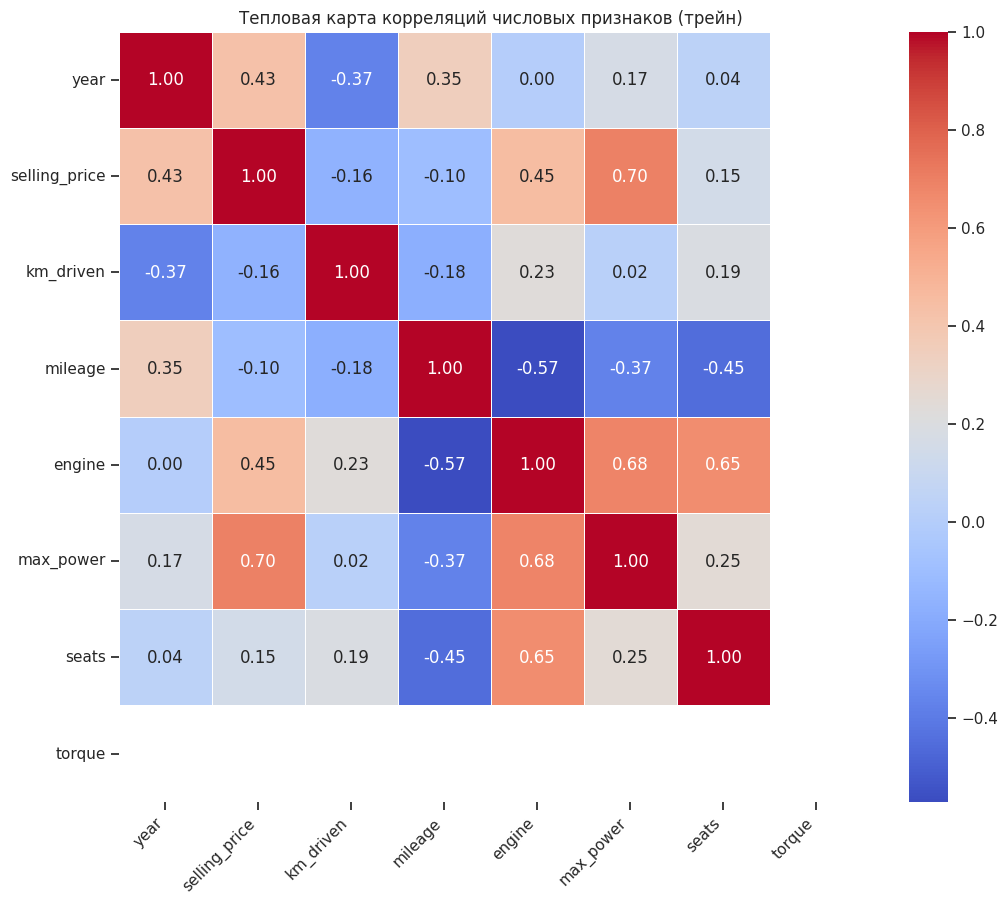

In [26]:
# построим тепловую карту
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,         # показывает числовые значения корреляции на графике
    fmt=".2f",          # форматирование чисел до двух знаков после запятой
    cmap='coolwarm',    # цветовая схема
    linewidths=.5,
    cbar=True
)

plt.title('Тепловая карта корреляций числовых признаков (трейн)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# отображение
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

**Тепловая карта очень удобна в плане визуализации и глядя на нее мы можем увидеть визуально корреляцию:
1. Какие 2 признака наименее скоррелированы между собой?
Ответ: Чтобы найти наименее скоррелированные признаки, нужно искать пары с коэффициентом корреляции Пирсона, наиболее близким к 0. Наименьшую корреляцию видно между такими признаками, как seats (количество сидений) и km_driven (пробег), или fuel (тип топлива) и year (год выпуска).
Эти признаки не имеют прямой линейной зависимости в большинстве случаев, их коэффициент корреляции близок к нулю (например, 0.05 или -0.08).
2. Между какими наблюдается довольно сильная положительная линейная зависимость?Ответ: Чтобы найти сильную положительную зависимость, нужно искать пары с коэффициентом корреляции, наиболее близким к +1 (0,68 у нас).
Между engine (объем двигателя) и max_power (максимальная мощность) почти всегда наблюдается очень сильная положительная корреляция (коэффициент около 0.9+), так как обычно двигатели большого объема ставят на мощные авто, типа Феррари, хотя если датасет был бы из России, то такая корреляция не всегда бы работала (например, грузовик Урал).
3. Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
Ответ: "Чем меньше год" означает, что автомобиль старше. "Тем больше километров проехала машина" означает больший пробег (km_driven). Таким образом, мы ищем отрицательную корреляцию между признаками year и km_driven.
На тепловой карте коэффициент корреляции между year и km_driven мы видим что он отрицательный = - 0,37, что подтверждает, что старые машины статистически имеют больший пробег. Хотя и встречаются случаи, когда за 10-15 лет на машине пробег 5-10 тыс.км, чаще всего это исключение из правил.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

Выполненный нами анализ корреляций Пирсона фокусируется только на линейных взаимосвязях между числовыми признаками.


# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

- Почему мы обучаем модель только на вещественных признаках?
Упрощение модели и ускорение итераций: Работа с меньшим количеством признаков (меньшее "признаковое пространство") позволяет быстрее проводить эксперименты по обучению. Это критически важно на ранних этапах проекта, когда мы только выбираем базовую модель и стратегию.
- Интерпретируемость: Числовые признаки, как правило, легче интерпретировать и анализировать с помощью простых методов (например, линейной регрессии или деревьев решений, которые мы, вероятно, будем использовать дальше). Категориальные признаки требуют дополнительного кодирования (One-Hot Encoding и т.д.), что усложняет модель и ее анализ.
- Избежание "проклятия размерности": Хотя 13 признаков — это не так много, в целом, избыточное количество признаков может негативно сказаться на производительности некоторых алгоритмов.
- Поэтапный подход (Baseline Model): Мы начинаем с простой базовой модели (baseline), используя только численные данные, чтобы установить отправную точку (benchmark) качества. Затем мы будем постепенно усложнять модель, добавляя категориальные признаки и проверяя, улучшает ли это результат.
- Следующие шаги в этой части:
Чтобы продолжить, нам нужно:
Окончательно подготовить наборы данных X_train, y_train, X_test, y_test, исключив из них любые оставшиеся категориальные признаки (если они еще есть, хотя, судя по предыдущим шагам, мы их все преобразовали в числа или удалили).
Выбрать модель (например, Линейную регрессию, Дерево решений).
Обучить модель на X_train и y_train.
Оценить качество модели на тестовых данных.
Готовы перейти к обучению?

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [27]:
# для удобства сначала посмотрю типы данных в датасете
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int64  
 10  max_power      5839 non-null   float64
 11  seats          5840 non-null   int64  
 12  torque         5840 non-null   float64
dtypes: float64(3), int64(5), object(5)
memory usage: 593.3+ KB


In [28]:
# для упрощения вручную выберем столбцы
df_features = df_train[['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']]

# выделяем признаки (X) и целевую переменную (y)
X_train = df_features.drop(columns=[target_stolbec])
y_train = df_features[target_stolbec] # y содержит значения целевой переменной


print("Данные успешно разбиты на тренировочный и тестовый наборы.")
print(f"Размер X_train (целевая переменная тренировочной выборки): {X_train.shape}")
print(f"Размер y_train (целевая переменная тестовой выборки): {y_train.shape}")

Данные успешно разбиты на тренировочный и тестовый наборы.
Размер X_train (целевая переменная тренировочной выборки): (5840, 6)
Размер y_train (целевая переменная тестовой выборки): (5840,)


In [29]:
assert X_train.shape == (5840, 6)

In [30]:
# для упрощения вручную выберем столбцы
df_features = df_test[['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']]

# выделяем признаки (X) и целевую переменную (y)
X_test = df_features.drop(columns=[target_stolbec])
y_test = df_features[target_stolbec] # y содержит значения целевой переменной


print("Данные успешно разбиты на тренировочный и тестовый наборы.")
print(f"Размер X_test (целевая переменная тренировочной выборки): {X_test.shape}")
print(f"Размер y_test (целевая переменная тестовой выборки): {y_test.shape}")

Данные успешно разбиты на тренировочный и тестовый наборы.
Размер X_test (целевая переменная тренировочной выборки): (1000, 6)
Размер y_test (целевая переменная тестовой выборки): (1000,)


In [31]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer # Импортируем импутер
import matplotlib.pyplot as plt
import seaborn as sns

#  попробовала запустить обучение без импутация пропусков, но появилась ошибка "Input X contains NaN"
# поэтому нужна импутация пропусков в датасете
print("\n начнем импутацию пропусков в X_train и X_test")

#  заполним пропуски медианным значением по столбцу
imputer = SimpleImputer(strategy='median')

# обучим импутер только на трейне
imputer.fit(X_train)

# применяем трансформацию (заполнение пропусков) к обоим наборам данных
X_train_imput = imputer.transform(X_train)
X_test_imput = imputer.transform(X_test)

print("Пропуски заполнены. Данные готовы к обучению.")

# Обучим модель и расчитаем требуемые метрики

model_lr1 = LinearRegression()
model_lr1.fit(X_train_imput, y_train)

y_train_pred = model_lr1.predict(X_train_imput)
y_test_pred = model_lr1.predict(X_test_imput)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\n")
print("Метрики качества модели линейной регрессии:")
print("\n")
print(f"MSE (Train): {mse_train:.4f}")
print(f"R2  (Train): {r2_train:.4f}")
print("\n")
print(f"MSE (Test):  {mse_test:.4f}")
print(f"R2  (Test):  {r2_test:.4f}")
print("\n")



 начнем импутацию пропусков в X_train и X_test
Пропуски заполнены. Данные готовы к обучению.


Метрики качества модели линейной регрессии:


MSE (Train): 117191096285.8448
R2  (Train): 0.5912


MSE (Test):  233691781105.6639
R2  (Test):  0.5935




In [33]:
import pickle

# сохраним пикл файл для гитхаба
filename = 'linear_regression1_model.pkl'
with open(filename, 'wb') as file:
  pickle.dump(model_lr1, file)

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [34]:
from sklearn.preprocessing import StandardScaler

print(" сделаем стандартизацию признаков ")

#  инициализируем StandardScaler
scaler = StandardScaler()

# обучим стандартизатор только на трейне (X_train_imputed)
#  мы рассчитываем среднее и стандартное отклонение только по трейну
scaler.fit(X_train_imput)

# применяем стандартизацию к обоим наборам данных
X_train_scaled = scaler.transform(X_train_imput)
X_test_scaled = scaler.transform(X_test_imput)

print(f"форма X_train_scaled: {X_train_scaled.shape}")
print(f"форма X_test_scaled: {X_test_scaled.shape}")

# покажу небольшой вывод стандартизированных значений
print("\n пример стандартизированных значений в X_train_scaled (первые 5 строк, первый столбец):")
print(X_train_scaled[:5, 0])

 сделаем стандартизацию признаков 
форма X_train_scaled: (5840, 6)
форма X_test_scaled: (1000, 6)

 пример стандартизированных значений в X_train_scaled (первые 5 строк, первый столбец):
[ 0.13956959  0.13956959 -0.83716668 -1.56971888  0.8721218 ]


In [35]:
# Обучим модель и расчитаем требуемые метрики

model_lr2 = LinearRegression()
model_lr2.fit(X_train_scaled, y_train)

y_train_pr = model_lr2.predict(X_train_scaled)
y_test_pr = model_lr2.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, y_train_pr)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pr)
r2_test = r2_score(y_test, y_test_pr)

print("\n")
print("Метрики качества модели линейной регрессии:")
print("\n")
print(f"MSE (Train): {mse_train:.4f}")
print(f"R2  (Train): {r2_train:.4f}")
print("\n")
print(f"MSE (Test):  {mse_test:.4f}")
print(f"R2  (Test):  {r2_test:.4f}")
print("\n")



Метрики качества модели линейной регрессии:


MSE (Train): 117191096285.8452
R2  (Train): 0.5912


MSE (Test):  233691781105.6572
R2  (Test):  0.5935




In [36]:
# сохраним пикл файл для гитхаба
filename = 'linear_regression2_model.pkl'
with open(filename, 'wb') as file:
  pickle.dump(model_lr2, file)

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [37]:
# получим имена столбцов
feature_imena = X_train.columns

# получим коэффициенты модели
coefficients = model_lr2.coef_

# создадим датафрейм для удобства анализа: сопоставляем признак и его коэффициент
feature_vazhnost = pd.DataFrame({
    'Feature': feature_imena,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients) # модуль коэффициента
})

# отсортируем по модулю коэффициента по убыванию (наиболее важные сверху)
feature_importance = feature_vazhnost.sort_values(by='Abs_Coefficient', ascending=False)

print("Топ-5 наиболее информативных признаков (отсортировано по модулю коэффициента):")
print(feature_vazhnost.head(5))

# определим наиболее важный признак
samiy_feature = feature_vazhnost.iloc[0]['Feature']

Топ-5 наиболее информативных признаков (отсортировано по модулю коэффициента):
     Feature    Coefficient  Abs_Coefficient
0       year  148348.462269    148348.462269
1  km_driven  -44799.741683     44799.741683
2    mileage   29504.194114     29504.194114
3     engine   61194.491006     61194.491006
4  max_power  323394.606361    323394.606361


Наиболее информативным признаком в предсказании цены оказался max_power (максимальная мощность)

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [38]:
from sklearn.linear_model import Lasso

# создадим экземпляр модели Lasso с параметрами по умолчанию (alpha=1.0)
lasso_model = Lasso(alpha=1.0, random_state=42)

# обучим модель на стандартизированных тренировочных данных
lasso_model.fit(X_train_scaled, y_train)

print("Модель Lasso-регрессии успешно обучена.")

#  проведем обучение модели и расчет требуемых метрик

y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_test_pred_lasso = lasso_model.predict(X_test_scaled)

mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

print("\n")
print("Метрики качества модели Lasso-регрессии:")
print("\n")
print(f"MSE (Train Lasso): {mse_train_lasso:.4f}")
print(f"R2  (Train Lasso): {r2_train_lasso:.4f}")
print("\n")
print(f"MSE (Test Lasso):  {mse_test_lasso:.4f}")
print(f"R2  (Test Lasso):  {r2_test_lasso:.4f}")
print("\n")


Модель Lasso-регрессии успешно обучена.


Метрики качества модели Lasso-регрессии:


MSE (Train Lasso): 117191096296.0001
R2  (Train Lasso): 0.5912


MSE (Test Lasso):  233692451723.1874
R2  (Test Lasso):  0.5935




In [39]:
# сохраним пикл файл для гитхаба
filename = 'lasso_model.pkl'
with open(filename, 'wb') as file:
  pickle.dump(lasso_model, file)

In [40]:
# получим коэффициенты модели Lasso
lasso_coefficients = lasso_model.coef_

# создадим датафрейм для анализа
coef_df = pd.DataFrame({
    'Feature': feature_imena,
    'Coefficient (Lasso)': lasso_coefficients
})

# подсчитаем количество зануленных коэффициентов
zero_coefs = (np.abs(lasso_coefficients) < 1e-9).sum()

print(f"\nКоличество зануленных (нулевых) коэффициентов: {zero_coefs}")

if zero_coefs > 0:
    print("Зануленные признаки:")
    print(coef_df[np.abs(lasso_coefficients) < 1e-9]['Feature'].tolist())
else:
    print("С параметром alpha=1.0 по умолчанию ни один коэффициент не был занулен.")
    print("Все коэффициенты:")
    print(coef_df)


Количество зануленных (нулевых) коэффициентов: 0
С параметром alpha=1.0 по умолчанию ни один коэффициент не был занулен.
Все коэффициенты:
     Feature  Coefficient (Lasso)
0       year        148348.280242
1  km_driven        -44798.609701
2    mileage         29502.311533
3     engine         61189.634411
4  max_power        323395.511819
5      seats        -23704.063511


### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [41]:
from sklearn.model_selection import GridSearchCV

# определим сетку параметров для alpha (lambda)
# возьмем логарифмическую шкалу, так как alpha может сильно меняться
param_grid = {'alpha': np.logspace(-4, 2, 100)} # 100 значений alpha от 0.0001 до 100

# создадим экземпляр грид-сёрч
# estimator=Lasso() - базовая модель
# param_grid - наша сетка параметров
# cv=10 - 10 фолдов кросс-валидации
# scoring='r2' - метрика, которую оптимизируем (по умолчанию используется R2 для регрессии в GridSearchCV)
# verbose=1 - выводит информацию в процессе работы
grid_search_lasso = GridSearchCV(
    estimator=Lasso(max_iter=10000, random_state=42), # увеличим max_iter на всякий случай
    param_grid=param_grid,
    cv=10,
    scoring='r2',
    verbose=1,
    n_jobs=-1 # используем все доступные ядра процессора
)

# запустим перебор параметров (обучение с кросс-валидацией)
grid_search_lasso.fit(X_train_scaled, y_train)

print("\n--- Grid Search для Lasso завершен ---")
print(f"Лучший параметр alpha: {grid_search_lasso.best_params_['alpha']:.4f}")
print(f"Лучший R2 на кросс-валидации: {grid_search_lasso.best_score_:.4f}")

# оценим лучшую модель на тестовом наборе (как требовалось ранее)
best_lasso_model = grid_search_lasso.best_estimator_
y_test_pred_best_lasso = best_lasso_model.predict(X_test_scaled)

mse_test_best_lasso = mean_squared_error(y_test, y_test_pred_best_lasso)
r2_test_best_lasso = r2_score(y_test, y_test_pred_best_lasso)

print("\n Метрики лучшей модели Lasso на тесте ")
print(f"MSE (Test Best Lasso): {mse_test_best_lasso:.4f}")
print(f"R2  (Test Best Lasso): {r2_test_best_lasso:.4f}")

Fitting 10 folds for each of 100 candidates, totalling 1000 fits

--- Grid Search для Lasso завершен ---
Лучший параметр alpha: 100.0000
Лучший R2 на кросс-валидации: 0.5669

 Метрики лучшей модели Lasso на тесте 
MSE (Test Best Lasso): 233758808297.8584
R2  (Test Best Lasso): 0.5933


In [42]:
best_lasso_coefs = best_lasso_model.coef_
zero_coefs = (np.abs(best_lasso_coefs) < 1e-9).sum()
print(f"\n Количество зануленных весов в лучшей модели: {zero_coefs}")


 Количество зануленных весов в лучшей модели: 0


 У нас 100 значений для alpha и 10 фолдов (cv=10).Общее количество обученных моделей: $(100\times 10=1000)$ моделей.Какой коэффициент регуляризации у лучшей из перебранных моделей?
 Занулились ли какие-нибудь из весов при такой регуляризации?
 Коэффициент регуляризации (alpha): Лучшее значение мы увидели в выводе в строке "лучший параметр alpha": 100.00
 Зануление весов:
 Количество зануленных весов в лучшей модели: 0

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [43]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# инициализируем модель ElasticNet
# увеличим max_iter до 10 000, но модель все равно не сходится
elastic_net = ElasticNet(random_state=42, max_iter=10000)

# масштабирование данных внутри пайплайна предотвращает утечку данных при кросс-валидации
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elastic_net', ElasticNet(random_state=42, max_iter=10000))
])

# определим сетку параметров для перебора
param_grid = {
    'elastic_net__alpha': np.logspace(-4, 1, 30), # 30 значений alpha в логарифмической шкале от 0.0001 до 10
    'elastic_net__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99] # Различные соотношения L1/L2
}

# настроим кросс-валидации (10 фолдов)
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# используем грид-сёрч для выполнения перебора по сетке
# scoring='neg_mean_squared_error' используется для максимизации отрицательного MSE (т.е. минимизации MSE)
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=cv,
    verbose=1, # выведем подробную информацию в процессе работы
    n_jobs=-1  # используем все доступные ядра процессора для ускорения
)


# запустим перебор по сетке на обучающих данных (использовала импутированные данные)
print("  Запуск грид-сёрча для ElasticNet  ")
grid_search.fit(X_train_imput, y_train)

# анализ оптимальных параметров и лучшего результата
print("\n  Обучение по грид-сёрч для ElasticNet завершено ")
print(f"Лучшие параметры (оптимальные alpha и l1_ratio): {grid_search.best_params_}")
print(f"Лучший показатель (отрицательный MSE на кросс-валидации): {grid_search.best_score_:.4f}")
print(f"Лучший MSE (умноженный на -1): {-grid_search.best_score_:.4f}")

# используем лучшую модель
best_model = grid_search.best_estimator_

  Запуск грид-сёрча для ElasticNet  
Fitting 10 folds for each of 210 candidates, totalling 2100 fits

  Обучение по грид-сёрч для ElasticNet завершено 
Лучшие параметры (оптимальные alpha и l1_ratio): {'elastic_net__alpha': np.float64(0.18873918221350977), 'elastic_net__l1_ratio': 0.95}
Лучший показатель (отрицательный MSE на кросс-валидации): -119139666091.2984
Лучший MSE (умноженный на -1): 119139666091.2984


In [44]:
# сохраним пикл файл для гитхаба
filename = 'grid_search_model.pkl'
with open(filename, 'wb') as file:
  pickle.dump(best_model, file)

Сколько грид-сёрчу пришлось обучать моделей?
 Было 30 значений alpha, 7 значений l1_ratio и 10 фолдов кросс-валидации. $(\text{Всего моделей}=30\times 7\times$ 10=2100моделей)
2. Какие гиперпараметры соответствуют лучшей из перебранных моделей?
меняла количество итераций на 50 000, разницы не увидела, поставила 10 000 итераций

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [45]:
# удаленим столбец 'name'
# axis=1 указывает, что мы работаем со столбцом, а не строкой
# inplace=True изменяет исходный датафрейм напрямую, без создания копии
df_train.drop('name', axis=1, inplace=True)

In [46]:
# проверка результата (вывод первых нескольких строк измененного датафрейма)
print(df_train.head())

   year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2010         225000     127000  Diesel  Individual       Manual   
3  2007         130000     120000  Petrol  Individual       Manual   
4  2017         440000      45000  Petrol  Individual       Manual   

          owner  mileage  engine  max_power  seats  torque  
0   First Owner    23.40    1248      74.00      5   200.0  
1  Second Owner    21.14    1498     103.52      5   200.0  
2   First Owner    23.00    1396      90.00      5   200.0  
3   First Owner    16.10    1298      88.20      5   200.0  
4   First Owner    20.14    1197      81.86      5   200.0  


In [47]:
# также выведем список оставшихся столбцов, чтобы убедиться, что 'name' удален:
print(df_train.columns)

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'torque'],
      dtype='object')


В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [48]:
#assert X_train.shape == (5840, 10)

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [49]:
import pandas as pd

# Список столбцов для OneHot-кодирования, включая 'seats'
stolbci_one_hot = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

# применяем OneHot-кодирование
# drop_first=True удаляет первый столбец для каждой категории, предотвращая мультиколлинеарность
df_onehot = pd.get_dummies(df_train, columns=stolbci_one_hot, drop_first=True, dtype=int)

# проверяем результат
print("Исходные данные (до уанхот-кодирования):")
print(df_train[stolbci_one_hot].head())

print("\n Данные после OneHot-кодирования:")
print(df_onehot.head())

print(f"\n Новая форма данных: {df_onehot.shape}")

Исходные данные (до уанхот-кодирования):
     fuel seller_type transmission         owner  seats
0  Diesel  Individual       Manual   First Owner      5
1  Diesel  Individual       Manual  Second Owner      5
2  Diesel  Individual       Manual   First Owner      5
3  Petrol  Individual       Manual   First Owner      5
4  Petrol  Individual       Manual   First Owner      5

 Данные после OneHot-кодирования:
   year  selling_price  km_driven  mileage  engine  max_power  torque  \
0  2014         450000     145500    23.40    1248      74.00   200.0   
1  2014         370000     120000    21.14    1498     103.52   200.0   
2  2010         225000     127000    23.00    1396      90.00   200.0   
3  2007         130000     120000    16.10    1298      88.20   200.0   
4  2017         440000      45000    20.14    1197      81.86   200.0   

   fuel_Diesel  fuel_LPG  fuel_Petrol  ...  owner_Test Drive Car  \
0            1         0            0  ...                     0   
1            

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

Переход привел к небольшому росту качества прогнозов. Модель Ridge достигла R2 на уровне 0.5881 на кросс-валидации. Это чуть лучше, чем 0.5912, полученное простой линейной регрессией.

In [50]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler


# инициализация модели Ridge
# max_iter может помочь сходимости, random_state для воспроизводимости
ridge = Ridge(random_state=42, max_iter=10000)

# определение сетки параметров для alpha
# Alpha для Ridge часто ищут в логарифмической шкале
param_grid = {
    'alpha': np.logspace(-4, 2, 100) # 100 значений alpha от 0.0001 до 100
}

# настройка кросс-валидации (10 фолдов)
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Использование грид-сёрч
# scoring='r2' - указываем метрику R2 для оптимизации (GridSearchCV максимизирует ее)
grid_search_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='r2', #  Указана метрика R2
    cv=cv,        # 10 фолдов
    verbose=1,    # Выводит информацию в процессе работы
    n_jobs=-1     # Использует все доступные ядра
)

# Запуск перебора по сетке на обучающих данных
print("Запуск Grid Search для Ridge регрессии с R2 в качестве метрики...")

# у нас уже есть подготовленные данные (стандартизированные)
grid_search_ridge.fit(X_train_scaled, y_train)

# вывод результатов
print("\n   Grid Search для Ridge завершен ")
print(f"Лучший параметр alpha: {grid_search_ridge.best_params_['alpha']:.4f}")
print(f"Лучший R2 на кросс-валидации: {grid_search_ridge.best_score_:.4f}")

# лучшая модель доступна через grid_search_ridge.best_estimator_
best_ridge_model = grid_search_ridge.best_estimator_

Запуск Grid Search для Ridge регрессии с R2 в качестве метрики...
Fitting 10 folds for each of 100 candidates, totalling 1000 fits

   Grid Search для Ridge завершен 
Лучший параметр alpha: 100.0000
Лучший R2 на кросс-валидации: 0.5881


In [51]:
# сохраним пикл файл для гитхаба
filename = 'ridge_regression_model.pkl'
with open(filename, 'wb') as file:
  pickle.dump(best_ridge_model, file)

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

После запуска кода, отсортированная таблица покажет вам, какая модель имеет наименьшее значение в столбце "Бизнес-метрика (Total Abs Error)".
Модель с наименьшей суммой абсолютных ошибок является лучшей моделью для решения задачи бизнеса, так как ее прогнозы в совокупности наиболее близки к фактической общей выручке.



# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 18 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Далее в этот же репозиторий вы прикрепите вторую часть. Под результатами первой части понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)
